## Project - Scrape and Analyze Data Analyst Job Requirements with Python

We will use Python to perform Web Scraping on a Job Posting Site using Python.
Objectives:
- Increase the efficiency of job vacancy sourcing,
- Improve the quality of job vacancy sourcing, and 
- Gain a competitive advantage

We will analyze the data using web scraping tools that can automatically extract job posting data from multiple job posting sites through Extract, Transform and Load process.  We will then use the analysis to provide a more efficient way to provide job vacancies to better serve clients. The feature will help the recruitment agency by getting relevant openings to their clients more quickly, giving their clients a competitive advantage over other applicants.

### The Challenge

Conduct web scraping analysis to automatically extract job posting data from a job posting site. To do this, we will set up the environment, identify the job posting site, scrape the data, process, analyze and visualize the data. We are at liberty to choose whichever major job posting website we prefer.
Thereafter, we will perform our analysis and share findings

## Importing the required Libraries

In [1]:
# Data scraping

from bs4 import BeautifulSoup
import requests
import urllib.parse

# Data manipulation
import pandas as pd
import numpy as np

# Import visualization Libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Appl styling
#plt.style.use("ggplot")
#rcParams['figure.figsize'] = (12, 6)
#sns.set_style('darkgrid')
#matplotlib.rcParams['font.size'] = 14
#matplotlib.rcParams['figure.figsize'] = (9, 5)
#matplotlib.rcParams['figure.facecolor'] = '#00000000' 

### Extraction Process

In [2]:
# Exracting function
def extract(page):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:128.0) Gecko/20100101 Firefox/128.0'}
    weburl = f'https://ai-jobs.net/?cat=12&key=&exp=&sal={page}'
    r = requests.get(weburl, headers)
    #r.status_code #The code gives the vaklue 200 when executed. This shows that the request is successful
    soup = BeautifulSoup(r.content, 'html.parser')
    return soup 


### Transform Process

In [3]:
# Transfroming function
def transform(soup):
    divs = soup.find_all('a', class_ = 'col pt-2 pb-3')
    
    # extracting and transforming the data from the website into a dictionary
    for item in divs:
        title = item.find('h2').text if item.find('h2') else "N/A"
        company = item.find('p').text if item.find('p') else "N/A"
        location = item.find('span', class_='d-none d-md-block text-break mb-1').text if item.find('span', class_='d-none d-md-block text-break mb-1') else "N/A"
        salary = item.find('span', class_='badge rounded-pill text-bg-success d-none d-md-inline-block').text if item.find('span', class_='badge rounded-pill text-bg-success d-none d-md-inline-block') else "N/A"
        experience = item.find('span', class_='badge rounded-pill text-bg-info my-md-1 d-none d-md-inline-block').text if item.find('span', class_='badge rounded-pill text-bg-info my-md-1 d-none d-md-inline-block') else "N/A"
        job_type = item.find('span', class_='badge rounded-pill text-bg-secondary my-md-1 ms-1').text if item.find('span', class_='badge rounded-pill text-bg-secondary my-md-1 ms-1') else "N/A"
        skills = [skill.text for skill in item.find_all('span', class_='badge rounded-pill text-bg-light')] 
        benefits_tags = item.find_all('span', class_ = 'badge rounded-pill text-bg-success')
        benefits = [benefit.text for benefit in benefits_tags] if benefits_tags else [ ]

        job = {
            'Title' : title,
            'Company' : company,
            'Salary': salary,
            'Experience': experience,
            'Job_type' : job_type,
            'Skills' : ', '.join(skills).strip('[ ]'),
            'Benefits' : ', '.join(benefits)
        }
        joblist.append(job)
    return


In [4]:
# create an empty list (dataframe) where the extracted and transformed data will be loaded.
joblist = []

for i in range (0, 40, 10):
    print(f'Getting page, {i}')
    c = extract(0)
    transform(c)

Getting page, 0
Getting page, 10
Getting page, 20
Getting page, 30


### Loading Process

In [5]:
# Move the data into a dataframe
import pandas as pd
df = pd.DataFrame(joblist)


In [6]:
df.head()

,Title,Company,Salary,Experience,Job_type,Skills,Benefits
0,Praktikant Datenanalyse und Künstliche Intelli...,BMW Group,N/A,Entry-level,Internship,"Clustering, Computer Science, Deep Learning, M...",
1,"Analyst II, Credit Analytics, Full Stack",AffirmRemote-first,USD 109K - 159K,Mid-level,Full Time,"Credit risk, CX, Data Analytics, Engineering, ...","Career development, Competitive pay, Equity / ..."
2,"Cloud Support Engineer (Analytics), Support En...",Amazon.com,USD 24K - 56K *,Mid-level,Full Time,"Architecture, AWS, Business Analytics, Compute...","Career development, Team events"
3,Sr. Manager/Associate Director - Supply Chain ...,Tiger Analytics,USD 63K - 147K *,Senior-level,Full Time,"Agile, Azure, Big Data, Consulting, Consulting...",Career development
4,Manager/Sr. Manager - Supply Chain Analytics (...,Tiger Analytics,USD 63K - 147K *,Senior-level,Full Time,"Agile, Azure, Big Data, Consulting, Consulting...",Career development


In [7]:
df.tail()

,Title,Company,Salary,Experience,Job_type,Skills,Benefits
235,Planning Manager – Master Data & Analytics,Ecolab,USD 52K - 123K *,Mid-level,Full Time,"Azure, Consulting, Engineering, Excel, Machine...","Career development, Health care, Startup envir..."
236,"Analyst, Automation Engineer",BlackRock,USD 19K - 44K *,Entry-level,Full Time,"AWS, Azure, Classification, Computer Science, ...","Career development, Flex hours, Flex vacation"
237,Performance Marketing Digital Measurement Sr. ...,Synchrony,USD 28K - 67K *,Senior-level,Full Time,"Agile, Banking, BigQuery, Data quality, Data v...","Health care, Wellness"
238,"VP, Analytics – Sam’s Club (L12)",Synchrony,USD 31K - 72K *,Executive-level,Full Time,"CX, Data analysis, Data Analytics, Data manage...","Career development, Flex hours"
239,"Senior Analyst-Analytics, Consumer Engagement,...",Synchrony,USD 24K - 57K *,Senior-level,Full Time,"Data Analytics, Data management, Economics, Fi...","Career development, Flex hours"


In [8]:
df.dtypes

Title         object
Company       object
Salary        object
Experience    object
Job_type      object
Skills        object
Benefits      object
dtype: object

In [9]:
# Create a csv file that hold the data
df.to_csv('Analyst_jobs.csv')

In [10]:
### Understanding the Data

In [11]:
df.isnull().sum

<bound method DataFrame.sum of      Title  Company  Salary  Experience  Job_type  Skills  Benefits
0    False    False   False       False     False   False     False
1    False    False   False       False     False   False     False
2    False    False   False       False     False   False     False
3    False    False   False       False     False   False     False
4    False    False   False       False     False   False     False
..     ...      ...     ...         ...       ...     ...       ...
235  False    False   False       False     False   False     False
236  False    False   False       False     False   False     False
237  False    False   False       False     False   False     False
238  False    False   False       False     False   False     False
239  False    False   False       False     False   False     False

[240 rows x 7 columns]>

In [12]:
# dropping null value columns to aavoid errors
df.dropna(inplace = True)
df.head()

,Title,Company,Salary,Experience,Job_type,Skills,Benefits
0,Praktikant Datenanalyse und Künstliche Intelli...,BMW Group,N/A,Entry-level,Internship,"Clustering, Computer Science, Deep Learning, M...",
1,"Analyst II, Credit Analytics, Full Stack",AffirmRemote-first,USD 109K - 159K,Mid-level,Full Time,"Credit risk, CX, Data Analytics, Engineering, ...","Career development, Competitive pay, Equity / ..."
2,"Cloud Support Engineer (Analytics), Support En...",Amazon.com,USD 24K - 56K *,Mid-level,Full Time,"Architecture, AWS, Business Analytics, Compute...","Career development, Team events"
3,Sr. Manager/Associate Director - Supply Chain ...,Tiger Analytics,USD 63K - 147K *,Senior-level,Full Time,"Agile, Azure, Big Data, Consulting, Consulting...",Career development
4,Manager/Sr. Manager - Supply Chain Analytics (...,Tiger Analytics,USD 63K - 147K *,Senior-level,Full Time,"Agile, Azure, Big Data, Consulting, Consulting...",Career development


In [13]:
# new dataframe with split value columns
import pandas as pd
new = df["Salary"].str.split(" ", n = 4, expand = True)
new

,0,1,2,3,4
0,N/A,None,None,None,None
1,USD,109K,-,159K,None
2,USD,24K,-,56K,*
3,USD,63K,-,147K,*
4,USD,63K,-,147K,*
...,...,...,...,...,...
235,USD,52K,-,123K,*
236,USD,19K,-,44K,*
237,USD,28K,-,67K,*
238,USD,31K,-,72K,*


In [14]:
# Making separate first name column from new dataframe
df['Currency'] = new[0]
df['Min Salary'] = new[1]
df['Max Salary'] = new[3]
df.head()

,Title,Company,Salary,Experience,Job_type,Skills,Benefits,Currency,Min Salary,Max Salary
0,Praktikant Datenanalyse und Künstliche Intelli...,BMW Group,N/A,Entry-level,Internship,"Clustering, Computer Science, Deep Learning, M...",,N/A,None,None
1,"Analyst II, Credit Analytics, Full Stack",AffirmRemote-first,USD 109K - 159K,Mid-level,Full Time,"Credit risk, CX, Data Analytics, Engineering, ...","Career development, Competitive pay, Equity / ...",USD,109K,159K
2,"Cloud Support Engineer (Analytics), Support En...",Amazon.com,USD 24K - 56K *,Mid-level,Full Time,"Architecture, AWS, Business Analytics, Compute...","Career development, Team events",USD,24K,56K
3,Sr. Manager/Associate Director - Supply Chain ...,Tiger Analytics,USD 63K - 147K *,Senior-level,Full Time,"Agile, Azure, Big Data, Consulting, Consulting...",Career development,USD,63K,147K
4,Manager/Sr. Manager - Supply Chain Analytics (...,Tiger Analytics,USD 63K - 147K *,Senior-level,Full Time,"Agile, Azure, Big Data, Consulting, Consulting...",Career development,USD,63K,147K


In [15]:
df["Lower_Salary"] = df["Min Salary"].str.strip("kK").astype(float)
df["Upper_Salary"] = df["Max Salary"].str.strip("kK").astype(float)
df.tail()

,Title,Company,Salary,Experience,Job_type,Skills,Benefits,Currency,Min Salary,Max Salary,Lower_Salary,Upper_Salary
235,Planning Manager – Master Data & Analytics,Ecolab,USD 52K - 123K *,Mid-level,Full Time,"Azure, Consulting, Engineering, Excel, Machine...","Career development, Health care, Startup envir...",USD,52K,123K,52.0,123.0
236,"Analyst, Automation Engineer",BlackRock,USD 19K - 44K *,Entry-level,Full Time,"AWS, Azure, Classification, Computer Science, ...","Career development, Flex hours, Flex vacation",USD,19K,44K,19.0,44.0
237,Performance Marketing Digital Measurement Sr. ...,Synchrony,USD 28K - 67K *,Senior-level,Full Time,"Agile, Banking, BigQuery, Data quality, Data v...","Health care, Wellness",USD,28K,67K,28.0,67.0
238,"VP, Analytics – Sam’s Club (L12)",Synchrony,USD 31K - 72K *,Executive-level,Full Time,"CX, Data analysis, Data Analytics, Data manage...","Career development, Flex hours",USD,31K,72K,31.0,72.0
239,"Senior Analyst-Analytics, Consumer Engagement,...",Synchrony,USD 24K - 57K *,Senior-level,Full Time,"Data Analytics, Data management, Economics, Fi...","Career development, Flex hours",USD,24K,57K,24.0,57.0


In [16]:
df.drop(columns = ["Min Salary", "Max Salary"], inplace = True)
df.head()

,Title,Company,Salary,Experience,Job_type,Skills,Benefits,Currency,Lower_Salary,Upper_Salary
0,Praktikant Datenanalyse und Künstliche Intelli...,BMW Group,N/A,Entry-level,Internship,"Clustering, Computer Science, Deep Learning, M...",,N/A,NaN,NaN
1,"Analyst II, Credit Analytics, Full Stack",AffirmRemote-first,USD 109K - 159K,Mid-level,Full Time,"Credit risk, CX, Data Analytics, Engineering, ...","Career development, Competitive pay, Equity / ...",USD,109.0,159.0
2,"Cloud Support Engineer (Analytics), Support En...",Amazon.com,USD 24K - 56K *,Mid-level,Full Time,"Architecture, AWS, Business Analytics, Compute...","Career development, Team events",USD,24.0,56.0
3,Sr. Manager/Associate Director - Supply Chain ...,Tiger Analytics,USD 63K - 147K *,Senior-level,Full Time,"Agile, Azure, Big Data, Consulting, Consulting...",Career development,USD,63.0,147.0
4,Manager/Sr. Manager - Supply Chain Analytics (...,Tiger Analytics,USD 63K - 147K *,Senior-level,Full Time,"Agile, Azure, Big Data, Consulting, Consulting...",Career development,USD,63.0,147.0


In [17]:
df = df.convert_dtypes()
df.dtypes

Title           string[python]
Company         string[python]
Salary          string[python]
Experience      string[python]
Job_type        string[python]
Skills          string[python]
Benefits        string[python]
Currency        string[python]
Lower_Salary             Int64
Upper_Salary             Int64
dtype: object

In [18]:
df['Avg_Salary(e3)'] = (df['Lower_Salary'] + df['Upper_Salary']) / 2
df.tail()

,Title,Company,Salary,Experience,Job_type,Skills,Benefits,Currency,Lower_Salary,Upper_Salary,Avg_Salary(e3)
235,Planning Manager – Master Data & Analytics,Ecolab,USD 52K - 123K *,Mid-level,Full Time,"Azure, Consulting, Engineering, Excel, Machine...","Career development, Health care, Startup envir...",USD,52,123,87.5
236,"Analyst, Automation Engineer",BlackRock,USD 19K - 44K *,Entry-level,Full Time,"AWS, Azure, Classification, Computer Science, ...","Career development, Flex hours, Flex vacation",USD,19,44,31.5
237,Performance Marketing Digital Measurement Sr. ...,Synchrony,USD 28K - 67K *,Senior-level,Full Time,"Agile, Banking, BigQuery, Data quality, Data v...","Health care, Wellness",USD,28,67,47.5
238,"VP, Analytics – Sam’s Club (L12)",Synchrony,USD 31K - 72K *,Executive-level,Full Time,"CX, Data analysis, Data Analytics, Data manage...","Career development, Flex hours",USD,31,72,51.5
239,"Senior Analyst-Analytics, Consumer Engagement,...",Synchrony,USD 24K - 57K *,Senior-level,Full Time,"Data Analytics, Data management, Economics, Fi...","Career development, Flex hours",USD,24,57,40.5


In [19]:

# Currency exchange rates (USD to KES, EUR to KES, etc.)
exchange_rates = {
    "USD": 128.88,
    "EUR": 140.57,
    "GBP": 167.27,
    "CAD": 94.32,
    "AUD": 87.20,
    "SGD": 96.73
    # Add other currencies and their rates here
}

# Convert mean salary to Kenyan Shillings (KES)
df["Exchange_Rate"] = df["Currency"].map(exchange_rates)
df["Mean_Salary_KES(^3)"] = df["Avg_Salary(e3)"] * df["Exchange_Rate"]

# Create a mapping of currency codes to country names
currency_to_country = {
    "USD": "United States",
    "GBP": "United Kingdom",
    "AUD": "Australia",
    "CAD": "Canada",
    "EUR": "Europe",
    "SGD": "Singapore"
    # Add other mappings as needed
}
df["Country"] = df["Currency"].map(currency_to_country)

# Replace "N/A" with NaN
df.replace("N/A", np.nan, inplace=True)


In [20]:
# Move the 'TotalPrice' column to come after the 'UnitPrice' column

cols = list(df.columns)
cols.remove("Country")  # Remove 'Country' from the list
cols.insert(cols.index("Company") + 1, "Country")  # Insert 'Country' after 'Company'
df = df[cols]  # Reorder the columns

# Display the resulting DataFrame
#print(df)


In [21]:
# Linearly interpolate missing values for Lower and Upper Salaries based on Currency
df['Lower_Salary'] = df.groupby('Currency')['Lower_Salary'].transform(lambda x: x.interpolate())
df['Upper_Salary'] = df.groupby('Currency')['Upper_Salary'].transform(lambda x: x.interpolate())
print("Linearly interpolated mean salaries:")
df.tail()

Linearly interpolated mean salaries:


,Title,Company,Country,Salary,Experience,Job_type,Skills,Benefits,Currency,Lower_Salary,Upper_Salary,Avg_Salary(e3),Exchange_Rate,Mean_Salary_KES(^3)
235,Planning Manager – Master Data & Analytics,Ecolab,United States,USD 52K - 123K *,Mid-level,Full Time,"Azure, Consulting, Engineering, Excel, Machine...","Career development, Health care, Startup envir...",USD,52.0,123.0,87.5,128.88,11277.0
236,"Analyst, Automation Engineer",BlackRock,United States,USD 19K - 44K *,Entry-level,Full Time,"AWS, Azure, Classification, Computer Science, ...","Career development, Flex hours, Flex vacation",USD,19.0,44.0,31.5,128.88,4059.72
237,Performance Marketing Digital Measurement Sr. ...,Synchrony,United States,USD 28K - 67K *,Senior-level,Full Time,"Agile, Banking, BigQuery, Data quality, Data v...","Health care, Wellness",USD,28.0,67.0,47.5,128.88,6121.8
238,"VP, Analytics – Sam’s Club (L12)",Synchrony,United States,USD 31K - 72K *,Executive-level,Full Time,"CX, Data analysis, Data Analytics, Data manage...","Career development, Flex hours",USD,31.0,72.0,51.5,128.88,6637.32
239,"Senior Analyst-Analytics, Consumer Engagement,...",Synchrony,United States,USD 24K - 57K *,Senior-level,Full Time,"Data Analytics, Data management, Economics, Fi...","Career development, Flex hours",USD,24.0,57.0,40.5,128.88,5219.64


In [22]:
df.head()

,Title,Company,Country,Salary,Experience,Job_type,Skills,Benefits,Currency,Lower_Salary,Upper_Salary,Avg_Salary(e3),Exchange_Rate,Mean_Salary_KES(^3)
0,Praktikant Datenanalyse und Künstliche Intelli...,BMW Group,NaN,<NA>,Entry-level,Internship,"Clustering, Computer Science, Deep Learning, M...",,<NA>,<NA>,<NA>,<NA>,NaN,<NA>
1,"Analyst II, Credit Analytics, Full Stack",AffirmRemote-first,United States,USD 109K - 159K,Mid-level,Full Time,"Credit risk, CX, Data Analytics, Engineering, ...","Career development, Competitive pay, Equity / ...",USD,109.0,159.0,134.0,128.88,17269.92
2,"Cloud Support Engineer (Analytics), Support En...",Amazon.com,United States,USD 24K - 56K *,Mid-level,Full Time,"Architecture, AWS, Business Analytics, Compute...","Career development, Team events",USD,24.0,56.0,40.0,128.88,5155.2
3,Sr. Manager/Associate Director - Supply Chain ...,Tiger Analytics,United States,USD 63K - 147K *,Senior-level,Full Time,"Agile, Azure, Big Data, Consulting, Consulting...",Career development,USD,63.0,147.0,105.0,128.88,13532.4
4,Manager/Sr. Manager - Supply Chain Analytics (...,Tiger Analytics,United States,USD 63K - 147K *,Senior-level,Full Time,"Agile, Azure, Big Data, Consulting, Consulting...",Career development,USD,63.0,147.0,105.0,128.88,13532.4


### Analysis and Visualizations

In [23]:
# Checking for  missing Values
df.isnull()

,Title,Company,Country,Salary,Experience,Job_type,Skills,Benefits,Currency,Lower_Salary,Upper_Salary,Avg_Salary(e3),Exchange_Rate,Mean_Salary_KES(^3)
0,False,False,True,True,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,False,False,False,False,False,False,False,False,False,False,False,False,False,False
236,False,False,False,False,False,False,False,False,False,False,False,False,False,False
237,False,False,False,False,False,False,False,False,False,False,False,False,False,False
238,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
# Checking for missing Values
df.notnull()

,Title,Company,Country,Salary,Experience,Job_type,Skills,Benefits,Currency,Lower_Salary,Upper_Salary,Avg_Salary(e3),Exchange_Rate,Mean_Salary_KES(^3)
0,True,True,False,False,True,True,True,True,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,True,True,True,True,True,True,True,True,True,True,True,True,True,True
236,True,True,True,True,True,True,True,True,True,True,True,True,True,True
237,True,True,True,True,True,True,True,True,True,True,True,True,True,True
238,True,True,True,True,True,True,True,True,True,True,True,True,True,True


### Distribution of Mean Salary based on Type of Country

C:\Users\DENNIS\AppData\Local\Temp\ipykernel_8472\2364161699.py:15: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=mean_salary_by_country.index, y=mean_salary_by_country.values,  palette=colors, hue=mean_salary_by_country.index)


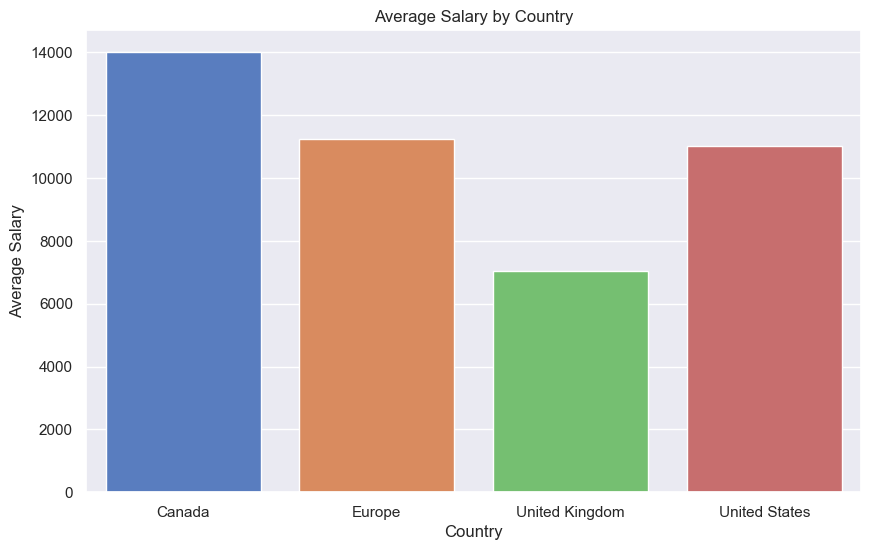

In [25]:
# Assuming your DataFrame is named 'df' with columns 'Country' and 'Salary'
df_clean = df.dropna(subset=['Mean_Salary_KES(^3)'])

# Calculate average salary by country
mean_salary_by_country = df_clean.groupby('Country')['Mean_Salary_KES(^3)'].mean()

# Set a muted color palette
colors = sns.color_palette("muted")

# Set the theme to 'darkgrid'
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Create a bar plot for average salary by country
sns.barplot(x=mean_salary_by_country.index, y=mean_salary_by_country.values,  palette=colors, hue=mean_salary_by_country.index)
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.title('Average Salary by Country')

plt.show()


#### Average Salaries by Country and Experience

C:\Users\DENNIS\AppData\Local\Temp\ipykernel_8472\3873536145.py:14: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x='Country', y='Mean_Salary_KES(^3)', hue='Experience', data=mean_salary_by_country_exp, palette=colors)


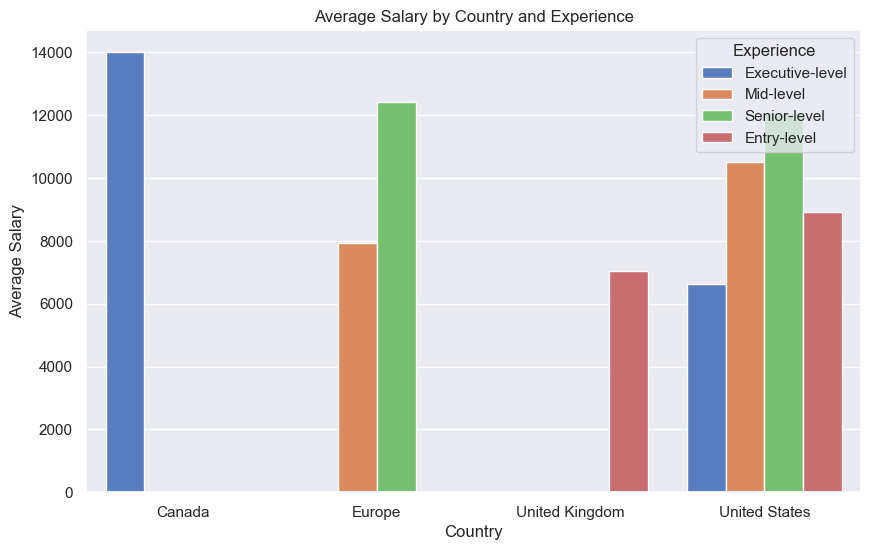

In [26]:
df_clean = df.dropna(subset=['Mean_Salary_KES(^3)'])

# Calculate average salary by country and experience
mean_salary_by_country_exp = df_clean.groupby(['Country', 'Experience'])['Mean_Salary_KES(^3)'].mean().reset_index()

# Set a muted color palette
colors = sns.color_palette("muted")

# Set the theme to 'darkgrid'
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Create a bar plot for average salary by country and experience
sns.barplot(x='Country', y='Mean_Salary_KES(^3)', hue='Experience', data=mean_salary_by_country_exp, palette=colors)
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.title('Average Salary by Country and Experience')

plt.show()



#### The Average Salaries by Jobe Type and Experience

C:\Users\DENNIS\AppData\Local\Temp\ipykernel_8472\830236542.py:15: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.barplot(x='Country', y='Mean_Salary_KES(^3)', hue='Job_type', data=mean_salary_by_country_exp, palette=colors)


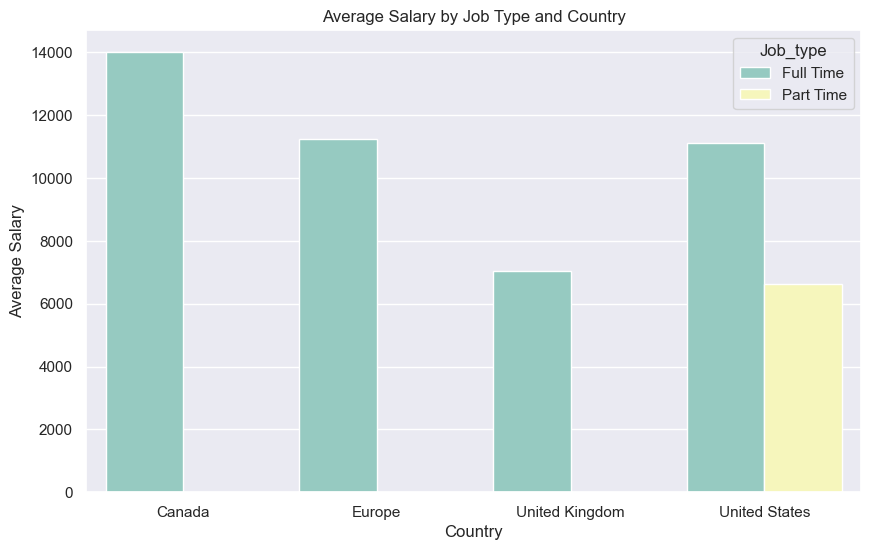

In [27]:
# Visulaizing The Average Salaries by Country and Experience
df_clean = df.dropna(subset=['Mean_Salary_KES(^3)'])

# Calculate average salary by country and experience
mean_salary_by_country_exp = df_clean.groupby(['Country', 'Job_type'])['Mean_Salary_KES(^3)'].mean().reset_index()

# Set a muted color palette
colors = sns.color_palette("Set3")

# Set the theme to 'darkgrid'
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Create a bar plot for average salary by country and experience
sns.barplot(x='Country', y='Mean_Salary_KES(^3)', hue='Job_type', data=mean_salary_by_country_exp, palette=colors)
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Type and Country')

plt.show()

### Findings and Recommendations

#### Findings

1. The European Countries are not specified apart from United Kingdom.
2. Only full time jobs are available
3. Most Countries have jobs in one or two level(s) of experience

#### Recommendations

1. Source for different levels of experience in order to attract more traffic and clients seeking employment opportunities
2. Specify the European Country where the job is located to make people understand issues form of communication expected to determine their suitability
3. Source for other types of jobs to encourage applications of suitable candidates that may need a=some level of flexibility 